In [2]:
!wget https://i.pinimg.com/564x/71/53/a6/7153a6f1e2f71070379423098286c00c.jpg -O homepicture.png

--2024-12-22 21:42:00--  https://i.pinimg.com/564x/71/53/a6/7153a6f1e2f71070379423098286c00c.jpg
Resolving i.pinimg.com (i.pinimg.com)... 146.75.120.84
Connecting to i.pinimg.com (i.pinimg.com)|146.75.120.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65809 (64K) [image/jpeg]
Saving to: 'homepicture.png'

     0K .......... .......... .......... .......... .......... 77%  640K 0s
    50K .......... ....                                       100% 88,9M=0,08s

2024-12-22 21:42:00 (821 KB/s) - 'homepicture.png' saved [65809/65809]



In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [4]:
def plot_image4(image_1, image_2, image_3, image_4, title_1="Original", title_2="New Image", title_3="Second Image",title_4="Third Image"):
    plt.figure(figsize=(20,20))
    plt.subplot(1, 4, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 4, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.subplot(1, 4, 3)
    plt.imshow(image_3,cmap="gray")
    plt.title(title_3)
    plt.subplot(1, 4, 4)
    plt.imshow(image_4,cmap="gray")
    plt.title(title_4)
    plt.show()
    
def plot_image(image_1, image_2, title_1="Original", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

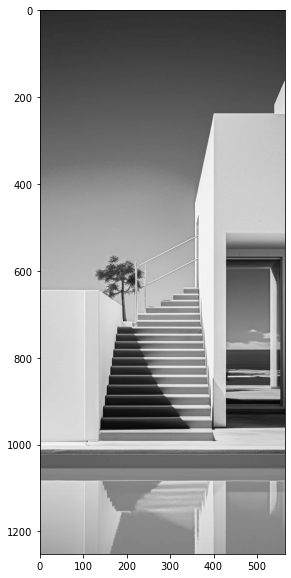

In [5]:
image_BGR = cv2.imread("homepicture.png")
image_gray = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (10,10))
plt.imshow(image_gray, cmap="gray")

plt.show()

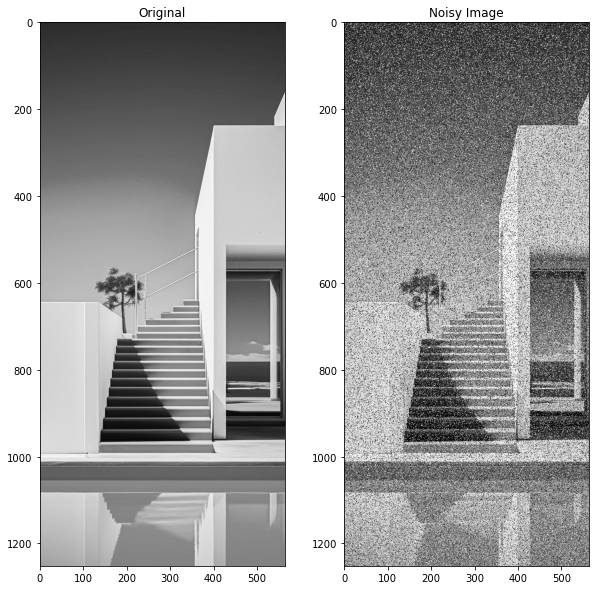

In [17]:
salt_pepper_image = image_gray.copy()
rows, cols= image_gray.shape

for x in range(rows) :
    for y in range (cols):
        noisy_or_not = np.random.random()
        if noisy_or_not < 0.25:
            black_or_white = np.random.random()
            salt_pepper_image[x, y] = 0 if black_or_white < 0.5 else 255

plot_image(image_gray, salt_pepper_image, title_1="Original",title_2="Noisy Image")

- As the kernel size increased, noise decreased, but image details disappeared. With a kernel size of 3, noise was still noticeable. When the kernel size increased to 7, the noise was effectively removed, but the image became blurry. The kernel size of 5 provided the best result, as there was no noticeable noise and the image clarity remained good.

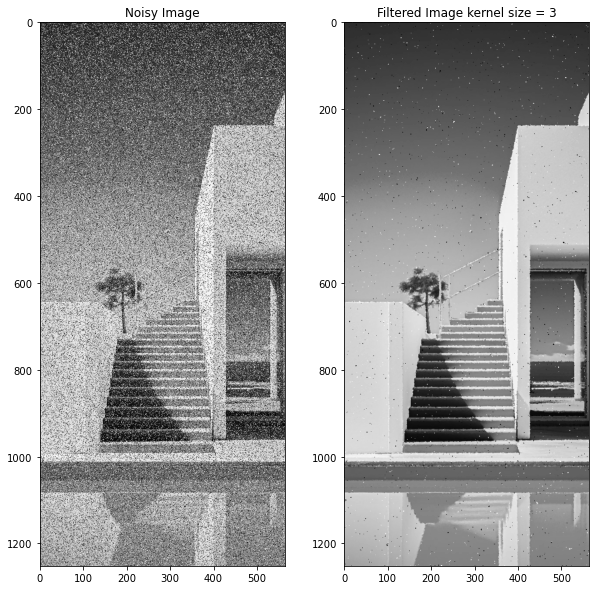

In [7]:
image_filtered = cv2.medianBlur(salt_pepper_image,3)
plot_image(salt_pepper_image,image_filtered,title_1="Noisy Image",title_2="Filtered Image kernel size = 3")

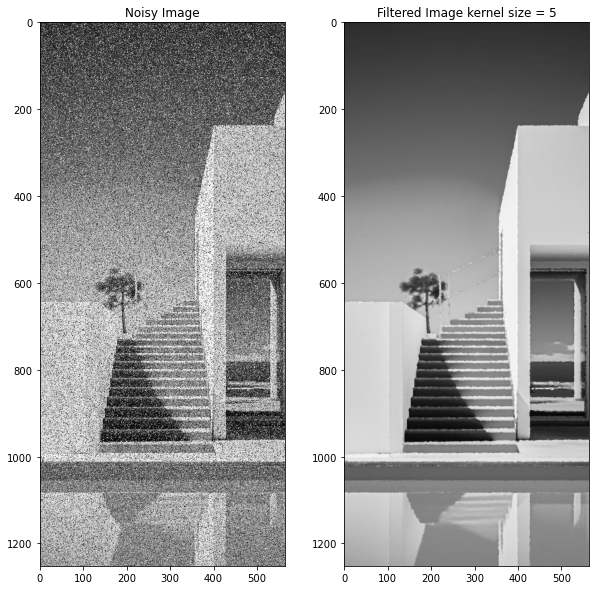

In [8]:
image_filtered = cv2.medianBlur(salt_pepper_image,5)
plot_image(salt_pepper_image,image_filtered,title_1="Noisy Image",title_2="Filtered Image kernel size = 5")

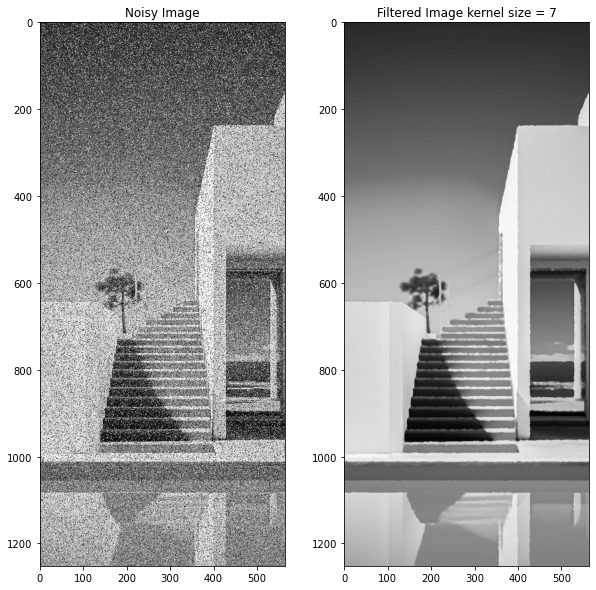

In [9]:
image_filtered = cv2.medianBlur(salt_pepper_image,7)
plot_image(salt_pepper_image,image_filtered,title_1="Noisy Image",title_2="Filtered Image kernel size = 7")

- Both matrices effectively detect diagonal edges. The first matrix more prominently detects edges running from the top right to the bottom left, while the second matrix reveals edges running from the top left to the bottom right. Applying them together provides more accurate edge detection.

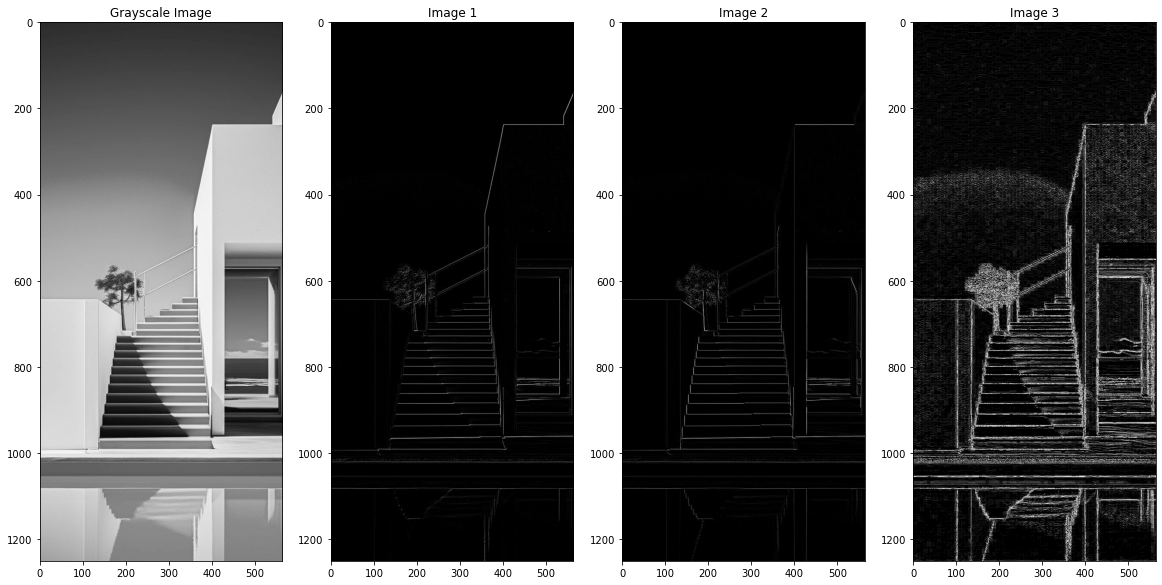

In [10]:
filter1 = np.array([[-1,0],
                    [0,1]])

filter2 = np.array([[0,-1],
                    [1,0]])

filtered1 = cv2.filter2D(image_gray, -1, filter1)
filtered2 = cv2.filter2D(image_gray, -1, filter2)

result = np.sqrt(filtered1**2+filtered2**2)

plot_image4(image_gray,filtered1,filtered2,result,title_1="Grayscale Image",title_2="Image 1",title_3="Image 2",title_4="Image 3")

- Low threshold values detect weaker edges more effectively. High threshold values, on the other hand, only detect the most prominent, strong edges, resulting in a more robust outcome.

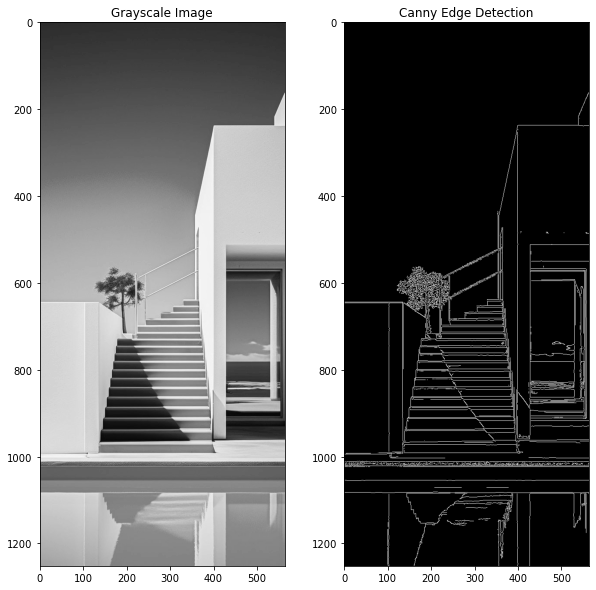

In [11]:
image_canny = cv2.Canny(image_gray,50,100)
plot_image(image_gray,image_canny,title_1="Grayscale Image",title_2="Canny Edge Detection")

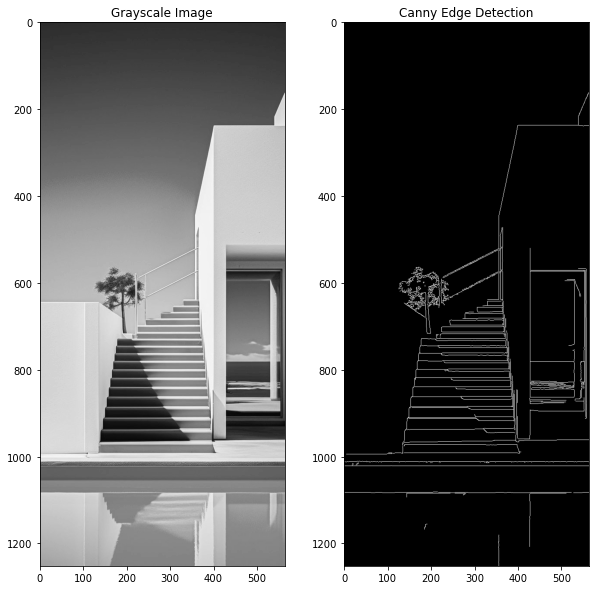

In [12]:
image_canny = cv2.Canny(image_gray,200,400)
plot_image(image_gray,image_canny,title_1="Grayscale Image",title_2="Canny Edge Detection")